We have saved the preprocessed Data into drive. Here is the link for the preprocessed data. https://drive.google.com/drive/folders/1dEOWdidqhyEp-_DjJ_9npP51uusV5u0X?usp=sharing



In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
import torch

print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)

Torch Version: 2.2.1+cu121
CUDA Available: True
CUDA Version: 12.1


In [3]:
pip install matplotlib IPython

In [5]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [4]:
pip install transformers[torch]

  Using cached accelerate-0.30.1-py3-none-any.whl (302 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.w

In [5]:
!pip install accelerate -U

In [6]:
pip install editdistance

In [ ]:
#!pip install --upgrade datasets pyarrow

In [7]:
import pandas as pd
import torchaudio
import torch
from datasets import Dataset, DatasetDict
from transformers import Wav2Vec2CTCTokenizer, Wav2Vec2Processor, Wav2Vec2FeatureExtractor
from sklearn.model_selection import train_test_split
import IPython.display as ipd

# Define tokenizer config
tokenizer_config = {
    "unk_token": "<unk>",
    "bos_token": "<s>",
    "eos_token": "</s>",
    "pad_token": "<pad>",
    "do_lower_case": False,
    "word_delimiter_token": "|",
    "tokenizer_class": "Wav2Vec2CTCTokenizer"
}

# Define special tokens map
special_tokens_map = {
    "bos_token": "<s>",
    "eos_token": "</s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>"
}

# Combine tokenizer config and special tokens map
tokenizer_init_args = {**tokenizer_config, **special_tokens_map}

# Define preprocessor config
preprocessor_config = {
    "do_normalize": True,
    "feature_extractor_type": "Wav2Vec2FeatureExtractor",
    "feature_size": 1,
    "padding_side": "right",
    "padding_value": 0,
    "return_attention_mask": False,
    "sampling_rate": 16000
}

# Define vocab
vocab = {
    "<s>": 0, "<pad>": 1, "</s>": 2, "<unk>": 3, "|": 4, "ँ": 5, "ं": 6, "ः": 7, "अ": 8, "आ": 9, "इ": 10,
    "ई": 11, "उ": 12, "ऊ": 13, "ऋ": 14, "ए": 15, "ऐ": 16, "ओ": 17, "औ": 18, "क": 19, "ख": 20, "ग": 21,
    "घ": 22, "ङ": 23, "च": 24, "छ": 25, "ज": 26, "झ": 27, "ञ": 28, "ट": 29, "ठ": 30, "ड": 31, "ढ": 32,
    "ण": 33, "त": 34, "थ": 35, "द": 36, "ध": 37, "न": 38, "प": 39, "फ": 40, "ब": 41, "भ": 42, "म": 43,
    "य": 44, "र": 45, "ल": 46, "ळ": 47, "व": 48, "श": 49, "ष": 50, "स": 51, "ह": 52, "ऽ": 53, "ा": 54,
    "ि": 55, "ी": 56, "ु": 57, "ू": 58, "ृ": 59, "ॄ": 60, "े": 61, "ै": 62, "ो": 63, "ौ": 64, "्": 65,
    "ॠ": 66, "0": 67, "1": 68, "2": 69, "3": 70, "4": 71, "5": 72, "6": 73, "7": 74, "8": 75, "9": 76
}

# Initialize tokenizer and processor
tokenizer = Wav2Vec2CTCTokenizer(vocab_file="/content/drive/MyDrive/sanskrit/vocab.json", vocab=vocab, **tokenizer_init_args)
feature_extractor = Wav2Vec2FeatureExtractor(**preprocessor_config)
processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

# Load paths and frame information from the .tsv file for the first 50 files
path_df = pd.read_csv('/content/drive/MyDrive/sanskrit/sanskrit_fairseq/train_cleaned.tsv', sep='\t', header=None, names=['full_path', 'frames'])#.head(50)
path_df['path'] = path_df['full_path'].apply(lambda x: '/content/drive/MyDrive/sanskrit/Audio files/' + x.split('.wav')[0] + '.wav')

# Load transcripts from the .wrd file for the first 50 files
transcript_df = pd.read_csv('/content/drive/MyDrive/sanskrit/sanskrit_fairseq/train.wrd', sep='\t', header=None, names=['transcript'])#.head(50)

# Combine both dataframes
data_df = pd.concat([path_df, transcript_df], axis=1)

# Convert to Hugging Face dataset
dataset = Dataset.from_pandas(data_df)

In [9]:
# First, ensure labels are part of your dataset after initial processing
def speech_file_to_array_fn(batch):
    speech_arrays = []
    sample_rates = []
    for path in batch["path"]:
        speech_array, sampling_rate = torchaudio.load(path)
        speech_arrays.append(speech_array.squeeze(0))
        sample_rates.append(sampling_rate)

    tokenized_labels = [processor.tokenizer(transcript, add_special_tokens=True).input_ids for transcript in batch["transcript"]]
    batch["speech"] = speech_arrays
    batch["sampling_rate"] = sample_rates
    batch["labels"] = tokenized_labels
    batch["target_text"] = batch["transcript"]
    return {key: value for key, value in batch.items() if key not in ['full_path', 'frames', 'path', 'transcript']}

dataset = dataset.map(speech_file_to_array_fn, batched=True, batch_size=100, num_proc=10, remove_columns=['full_path', 'frames', 'path', 'transcript'])

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=10):   0%|          | 0/9710 [00:00<?, ? examples/s]

In [10]:
# Function to pad the audio samples correctly
def pad_audio(batch):
    audios = [torch.tensor(audio) for audio in batch['speech']]
    max_length = max(audio.shape[0] for audio in audios)

    padded_audios = []
    for audio in audios:
        if audio.shape[0] < max_length:
            padding = torch.zeros((max_length - audio.shape[0],))
            audio = torch.cat([audio, padding], dim=0)
        elif audio.shape[0] > max_length:
            audio = audio[:max_length]
        padded_audios.append(audio)

    batch["input_values"] = padded_audios
    return batch

dataset = dataset.map(pad_audio, batched=True, batch_size=50)

Map:   0%|          | 0/9710 [00:00<?, ? examples/s]

In [16]:
# Function to pad the labels correctly
def pad_labels(batch):
    max_label_length = max(len(label) for label in batch['labels'])
    padded_labels = [label + [processor.tokenizer.pad_token_id] * (max_label_length - len(label)) for label in batch['labels']]
    padded_labels_tensors = [torch.tensor(label) for label in padded_labels]
    batch['labels'] = padded_labels_tensors
    return batch

dataset = dataset.map(pad_labels, batched=True, batch_size=100)

Map:   0%|          | 0/9710 [00:00<?, ? examples/s]

In [17]:
# Inspect samples to debug data preparation
# def inspect_samples(batch):
#     for i in range(len(batch['input_values'])):
#         print(f"Sample {i}")
#         print("Number of input values:", len(batch['input_values'][i]))
#         print("Input values:", batch['input_values'][i][:10])  # Print the first 10 values
#         print("Labels:", batch['labels'][i])
#         print("Transcript:", processor.decode(batch['labels'][i], skip_special_tokens=True))

# dataset = dataset.map(inspect_samples, batched=True, batch_size=8)

# Efficiently split the dataset using the `train_test_split` method from Hugging Face's `Dataset` library
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

def prepare_dataset(batch):
    if isinstance(batch["input_values"], list):
        batch["input_values"] = torch.tensor(batch["input_values"], dtype=torch.float)
    labels = batch["labels"]
    batch["labels"] = labels
    return batch

train_dataset = train_dataset.map(prepare_dataset)
test_dataset = test_dataset.map(prepare_dataset)


Map:   0%|          | 0/7768 [00:00<?, ? examples/s]

Map:   0%|          | 0/1942 [00:00<?, ? examples/s]

In [18]:
# Save the datasets to disk
train_dataset.save_to_disk('/content/drive/MyDrive/sanskrit/preprocessed/train_dataset')
test_dataset.save_to_disk('/content/drive/MyDrive/sanskrit/preprocessed/test_dataset')

Saving the dataset (0/39 shards):   0%|          | 0/7768 [00:00<?, ? examples/s]

Saving the dataset (0/10 shards):   0%|          | 0/1942 [00:00<?, ? examples/s]

In [8]:
# Later, load the datasets from disk
from datasets import Dataset, DatasetDict, load_from_disk
train_dataset = load_from_disk('/content/drive/MyDrive/sanskrit/preprocessed/train_dataset')
test_dataset = load_from_disk('/content/drive/MyDrive/sanskrit/preprocessed/test_dataset')

Loading dataset from disk:   0%|          | 0/39 [00:00<?, ?it/s]

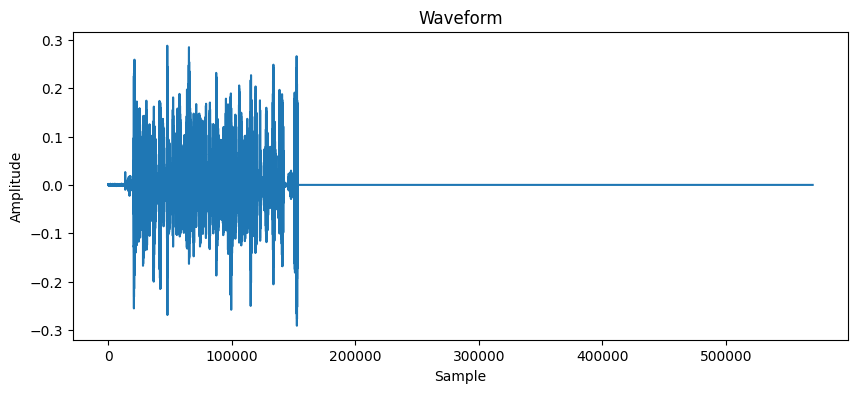

In [10]:
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Function to plot and play audio
def plot_play_audio(audio_tensor, sampling_rate):
    # Convert tensor to numpy array
    audio_np = audio_tensor.numpy()

    # Plotting the waveform
    plt.figure(figsize=(10, 4))
    plt.plot(audio_np)
    plt.title("Waveform")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

    # Playing the audio
    display(Audio(audio_np, rate=sampling_rate))

# Select a sample from the dataset
sample = train_dataset[30]  # Change index as needed to explore different samples

# Extract the audio tensor and sampling rate
audio_tensor = torch.tensor(sample['input_values'])
sampling_rate = sample['sampling_rate']  # Access directly without subscripting

# Plot and play the audio
plot_play_audio(audio_tensor, sampling_rate)

In [11]:
# Function to display data
def display_data(dataset, index=1):
    data = dataset[index]
    print("Original Transcript:", data["target_text"])
    print("Tokenized Transcript:", data["labels"])
    # print("Input Values Shape:", data["input_values"].shape)

    # Display audio
    # print("Playing audio...")
    # ipd.display(ipd.Audio(data["input_values"].numpy(), rate=16000))

# Displaying the first item in the train dataset
print("Train Dataset Sample:")
display_data(train_dataset)

# Displaying the first item in the test dataset
print("\nTest Dataset Sample:")
display_data(test_dataset)

Train Dataset Sample:
Original Transcript:  सूच्यौषधम् अद्य सूच्यौषधउत्सवस्य द्वितीय दिवसः अस्ति
Tokenized Transcript: [4, 51, 58, 24, 65, 44, 64, 50, 37, 43, 65, 4, 8, 36, 65, 44, 4, 51, 58, 24, 65, 44, 64, 50, 37, 12, 34, 65, 51, 48, 51, 65, 44, 4, 36, 65, 48, 55, 34, 56, 44, 4, 36, 55, 48, 51, 7, 4, 8, 51, 65, 34, 55, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
from transformers import Wav2Vec2Config, Wav2Vec2ForCTC

config = Wav2Vec2Config(
    activation_dropout=0.1,
    apply_spec_augment=True,
    architectures=["Wav2Vec2ForCTC"],
    attention_dropout=0.1,
    bos_token="<s>",
    bos_token_id=0,
    codevector_dim=256,
    contrastive_logits_temperature=0.1,
    conv_bias=False,
    conv_dim=[512, 512, 512, 512, 512, 512, 512],
    conv_kernel=[10, 3, 3, 3, 3, 2, 2],
    conv_stride=[5, 2, 2, 2, 2, 2, 2],
    ctc_loss_reduction="mean",
    ctc_zero_infinity=False,
    diversity_loss_weight=0.1,
    do_lower_case=False,
    do_stable_layer_norm=False,
    eos_token="</s>",
    eos_token_id=2,
    feat_extract_activation="gelu",
    feat_extract_norm="group",
    feat_proj_dropout=0.1,
    feat_quantizer_dropout=0.0,
    final_dropout=0.1,
    gradient_checkpointing=True,
    hidden_act="gelu",
    hidden_dropout=0.1,
    hidden_size=768,
    initializer_range=0.02,
    intermediate_size=3072,
    layer_norm_eps=1e-5,
    layerdrop=0.1,
    mask_feature_length=10,
    mask_feature_prob=0.0,
    mask_time_length=10,
    mask_time_prob=0.05,
    model_type="wav2vec2",
    num_attention_heads=12,
    num_codevector_groups=2,
    num_codevectors_per_group=320,
    num_conv_pos_embedding_groups=16,
    num_conv_pos_embeddings=128,
    num_feat_extract_layers=7,
    num_hidden_layers=12,
    num_negatives=100,
    pad_token="<PAD>",
    pad_token_id=1,
    proj_codevector_dim=256,
    torch_dtype="float32",
    transformers_version="4.9.1",
    unk_token="<UNK>",
    vocab_size=77,
    word_delimiter_token="|"
)

model = Wav2Vec2ForCTC(config)

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments, Wav2Vec2ForCTC
import torch
import numpy as np
import editdistance

# Define a custom data collator for CTC
class CustomDataCollatorCTC:
    def __init__(self, processor, padding=True):
        self.processor = processor
        self.padding = padding

    def __call__(self, features):
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        # Pad the input features (audio)
        batch = self.processor.feature_extractor.pad(
            input_features,
            padding=self.padding,
            return_tensors="pt"
        )

        # Pad the label features (transcripts)
        labels_batch = self.processor.tokenizer.pad(
            label_features,
            padding=self.padding,
            return_tensors="pt"
        )

        # Replace padding with -100 to ignore them in loss computation
        labels = labels_batch["input_ids"].masked_fill(labels_batch["input_ids"] == self.processor.tokenizer.pad_token_id, -100)

        batch["labels"] = labels

        return batch


# Define WER metric function
def wer_metric(pred_transcriptions, true_transcriptions):
    total_wer = 0
    total_words = 0

    for pred, true in zip(pred_transcriptions, true_transcriptions):
        pred_words = pred.split()
        true_words = true.split()
        distance = editdistance.eval(pred_words, true_words)
        total_wer += distance
        total_words += len(true_words)

    wer = total_wer / total_words if total_words != 0 else 0
    return wer

# Define compute_metrics function
def compute_metrics(eval_pred):
    preds = eval_pred.predictions
    labels = eval_pred.label_ids

    # Convert logits to token IDs
    pred_ids = np.argmax(preds, axis=-1)

    # Decode predictions and labels
    pred_transcriptions = processor.batch_decode(pred_ids, skip_special_tokens=True)
    true_transcriptions = processor.batch_decode(labels, skip_special_tokens=True)

    # Print the first few predictions and true transcriptions for debugging
    print("Predictions:", pred_transcriptions[:15])
    print("True transcriptions:", true_transcriptions[:15])

    wer_score = wer_metric(pred_transcriptions, true_transcriptions)
    return {"wer": wer_score}

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/sanskrit/ABC",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=200,
    max_steps=20000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=250,
    eval_steps=250,
    logging_steps=250,
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
)

# Create custom data collator instance
data_collator = CustomDataCollatorCTC(processor=processor, padding=True)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,
)

# Start training
trainer.train()



max_steps is given, it will override any value given in num_train_epochs
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
250,27.028300,13.318893,1.000795
500,11.438400,13.454000,1.000889
750,11.599000,12.666183,1.000421
1000,7.872900,8.644076,0.999906
1250,4.006100,8.786393,0.999906
1500,4.504400,8.714275,0.999906
1750,4.200700,8.037510,0.999953
2000,4.156200,8.226366,1.000000
2250,3.690100,8.632833,0.999906


Predictions: ['म', 'म् ्म्म्म', 'म', 'म', '्म्म्म्म् ्म', 'म म म ्म्म म', 'म', 'म्म्म', 'म', 'म', 'म', 'म म', 'म्म्म', 'म्म्म्म्म्म्म', 'म']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थल

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['म म्', 'म म', 'म', 'म्', 'म', 'म', 'म', 'म म म', 'म्', 'म', 'म्', 'म म म्', 'म्', 'म्', 'म्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः राज्य

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['म्', 'म्', 'म्', 'म्', 'म्', 'म म्', 'म म्', 'म म म्', 'म्', 'म्', 'म्', 'म्', 'म्', 'म्', 'म्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः रा

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्', '्', '्', '्', '्', '्', '्', '्', '्', '्', '्', '्', '्', '्', '्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः राज्योः विधानसभा निर्वाचन

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्', '्', '्', '्', '्', '्', '्य', '्', '्', '्य', '्', '्य', '्', '्', '्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः राज्योः विधानसभा निर्व

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्य', '्य', '्य', '्', '्य', '्य', '्', '्य', '्य', '्य', '्', '्य', '्य', '्', '्य']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः राज्योः विधानस

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्र्', '्र्र्य', '्र', 'स्', '्र', '्र्य', '्र्र', '्', '्', '्र', '्र्र', '्र्र्य', '्', '्', '्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः 

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्र्', '्यस्', '् ्', 'स्', 'स्य्र', '्र्र', '् ्', '्र', '्', 'स्', '्', 'स्स्य्र', '्र', '्', '्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Predictions: ['्', '्स्', '्', '्', 'स्स्', '्', '्र', '्यस्', 'स्', '्', '्', '्य्य्स्', '्स्', '्', '्य्']
True transcriptions: ['यात्रायामेतस्यां ह्यूस्टने न्यूयर्के च श्रीमोदिनः विभिन्नाः कार्यक्रमाः सन्ति', 'सः अवादीत् यत् द्वाभ्याम् अपि देशाभ्याम् कोरोनामहामार्या विषमे परिस्थितौ स्वसामर्थ्यं प्रदर्शितम्', 'ब्रिस्बेन नगरे समायोजितायां क्रिकेट निकषस्पर्धायां भारतेन क्रीडकत्रयस्य सुरक्षापूर्वकं आस्ट्रेलियादेशः पराजितः', 'उत्तरप्रदेशस्य विंशति जनपदेषु पंचायत निर्वाचनस्य तृतीयचरणाय मतदानं प्रचलति', 'भाजपादल नेता नरेनद्रमोदी अह्य मदुरै गमिष्यति नैर्वाचनिक सभां संबोधयतुिम्', 'अनेन रूजा पीडितानां उपचाराय पञ्चाशत् अर्बुदडलरमित राशि प्रख्यापयिष्यते', 'अस्मिन अवसरे राष्ट्रपतिना रामनाथकोविन्देन उपराष्ट्रपतिना एम वेंकैया नायडुना प्रधानमन्त्रिणा नरेन्द्रमोदिना च ड अम्बेडकरं प्रति श्रद्धांजलय अर्पिता', 'उपनिर्वाचनम् सप्तदशराज्येषु एकपञ्चाशत् विधानसभासनानां कृते अथ च लोकसभायाः आसनद्वयाय उपनिर्वाचनानि अनुष्ठीयन्ते', 'शपथग्रहणसमारोह सायं मुम्बईस्थे शिवाजी पार्क स्थले विधास्यते', 'एतयोः उभयोः राज्य

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
